In [1]:
import time
import pandas as pd
from src.data.get_full_data_coinglass import load_future_data_for_exchange_pair, load_spot_data_for_exchange_pair, CoinGlassAPI
from src.data.process_tickers import process_tickers_separately
from src.data.strat_analyse import prepare_data_for_analyse, strat_analyse

# Example usage of the API
api_key = "5a7e3eb1256241899a54cd41cfd38825"
start_date = "2023-01-01"
end_date = "2024-12-31"
limit = 1000
interval = "4h"

api = CoinGlassAPI(api_key)

# future data
btc_data = load_future_data_for_exchange_pair(api,  "Binance", "BTCUSDT", start_date, end_date, interval, limit, True)
print(btc_data)

# spot data
btc_data = load_spot_data_for_exchange_pair(api,  "Binance", "BTCUSDT", start_date, end_date, interval, limit, True)
print(btc_data)


                   date   timestamp   FR_open  FR_close   FR_high    FR_low  \
0   2024-11-09 16:00:00  1731168000  0.010000  0.010000  0.010000  0.010000   
1   2024-11-09 20:00:00  1731182400  0.010000  0.010000  0.010000  0.010000   
2   2024-11-10 00:00:00  1731196800  0.010000  0.010000  0.010000  0.010000   
3   2024-11-10 04:00:00  1731211200  0.010000  0.025717  0.026243  0.010000   
4   2024-11-10 08:00:00  1731225600  0.025717  0.019436  0.025717  0.019429   
..                  ...         ...       ...       ...       ...       ...   
303 2024-12-30 04:00:00  1735531200  0.006492  0.008791  0.008791  0.006380   
304 2024-12-30 08:00:00  1735545600  0.008791  0.010000  0.010000  0.008791   
305 2024-12-30 12:00:00  1735560000  0.010000  0.010000  0.010000  0.010000   
306 2024-12-30 16:00:00  1735574400  0.010000  0.010000  0.010000  0.010000   
307 2024-12-30 20:00:00  1735588800  0.010000  0.010000  0.010000  0.010000   

    perp_exchange perp_symbol  
0         Binance  

### Getting spot and futures tickers from the API.

In [2]:
include_list =  ['BTC', 'ETH']
exclude_list = ['XBT/USD', 'BTC-USD', 'ETH-USD', 'BTC_USD', 'ETH_USD', 'ETH/USD']

ticker_map_spot = CoinGlassAPI(api_key).get_supported_tickers(include_list, exclude_list) # get tickers for spot

df_ticker_spot = ticker_map_spot.rename(columns={'instrumentId': 'spotInstrumentId'})
df_ticker_spot.to_csv("./data/tickers/ticker_map_spot.csv", index=False)
print(df_ticker_spot)


ticker_map_futures = CoinGlassAPI(api_key).get_supported_tickers(include_list, exclude_list, futures=True) #get tickers for futures

df_ticker_futures = ticker_map_futures.rename(columns={'instrumentId': 'futuresInstrumentId'})
df_ticker_futures.to_csv("./data/tickers/ticker_map_futures.csv", index=False)
print(df_ticker_futures)

      exchange baseAsset spotInstrumentId
0      Binance       BTC          BTCUSDT
1      Binance       ETH          ETHUSDT
2     Bitfinex       BTC           BTCUSD
3     Bitfinex       ETH           ETHUSD
4        Bybit       BTC          BTCUSDT
5        Bybit       ETH          ETHUSDT
6     Coinbase       BTC         BTC-USDT
7     Coinbase       ETH         ETH-USDT
8   Crypto.com       BTC         BTC_USDT
9   Crypto.com       ETH         ETH_USDT
10      Kraken       ETH         ETH/USDT
11      Kraken       BTC         XBT/USDT
12         OKX       BTC         BTC-USDT
13         OKX       ETH         ETH-USDT
     exchange baseAsset futuresInstrumentId
0     Binance       BTC         BTCUSD_PERP
1     Binance       BTC       BTCUSD_250627
2     Binance       BTC       BTCUSD_250926
3     Binance       ETH         ETHUSD_PERP
4     Binance       ETH       ETHUSD_250627
..        ...       ...                 ...
173       OKX       ETH     ETH-USDT-250926
174       OKX     

Manually clean futures tickers. Cleaned tickers in ./data/tickers/ticker_map_futures_cleaned.csv .

### Collect data for our 4 events

#### Luna collapse, 9 may 2022

In [3]:
# Luna collapse 

api_key = "5a7e3eb1256241899a54cd41cfd38825"
start_date = "2022-03-09" # 2 months before the collapse
end_date = "2022-06-09" # 1 month after the collapse
limit = 4500
interval = "1d" 

api = CoinGlassAPI(api_key)

# futures data
tickers_df = pd.read_csv("./data/tickers/ticker_map_futures_cleaned.csv")
concat = process_tickers_separately(
    api = api, 
    ticker_map = tickers_df, 
    start_date = start_date,
    end_date = end_date, 
    interval = interval, 
    limit = limit
    )

print(concat)

time.sleep(60) # to avoid hitting the API rate limit

# spot data
tickers_df = pd.read_csv("./data/tickers/ticker_map_spot.csv")
concat = process_tickers_separately(
    api = api, 
    ticker_map = tickers_df, 
    start_date = start_date,
    end_date = end_date, 
    interval = interval, 
    limit = limit, 
    is_spot = True
    )

print(concat)

Processing futures data for BTCUSDT on Binance...
Processing futures data for ETHUSDT on Binance...
Processing futures data for BTC-USDT on BingX...
No funding rate data available for BTC-USDT on BingX
No funding rate data available for BTC-USDT on BingX
No futures data available for BTC-USDT on BingX
Processing futures data for ETH-USDT on BingX...
No funding rate data available for ETH-USDT on BingX
No funding rate data available for ETH-USDT on BingX
No futures data available for ETH-USDT on BingX
Processing futures data for tBTCF0:USTF0 on Bitfinex...
Processing futures data for tETHF0:USTF0 on Bitfinex...
Processing futures data for BTCUSDT_UMCBL on Bitget...
Processing futures data for ETHUSDT_UMCBL on Bitget...
Processing futures data for XBTUSDT on Bitmex...
Processing futures data for ETHUSDT on Bitmex...
Processing futures data for BTCUSDT on Bitunix...
No funding rate data available for BTCUSDT on Bitunix
No funding rate data available for BTCUSDT on Bitunix
No futures data 

#### FTX collapse, 16 nov 2022

In [4]:
# FTX collapse 

api_key = "5a7e3eb1256241899a54cd41cfd38825"
start_date = "2022-09-16" # 2 months before the collapse
end_date = "2022-12-16" # 1 month after the collapse
limit = 4500
interval = "1d"

api = CoinGlassAPI(api_key)

time.sleep(60) # to avoid hitting the API rate limit

# futures data
tickers_df = pd.read_csv("./data/tickers/ticker_map_futures_cleaned.csv")
concat = process_tickers_separately(
    api = api, 
    ticker_map = tickers_df, 
    start_date = start_date,
    end_date = end_date, 
    interval = interval, 
    limit = limit
    )

print(concat)

time.sleep(60) # to avoid hitting the API rate limit

# spot data
tickers_df = pd.read_csv("./data/tickers/ticker_map_spot.csv")
concat = process_tickers_separately(
    api = api, 
    ticker_map = tickers_df, 
    start_date = start_date,
    end_date = end_date, 
    interval = interval, 
    limit = limit, 
    is_spot = True
    )

print(concat)

Processing futures data for BTCUSDT on Binance...
Processing futures data for ETHUSDT on Binance...
Processing futures data for BTC-USDT on BingX...
No funding rate data available for BTC-USDT on BingX
No funding rate data available for BTC-USDT on BingX
No futures data available for BTC-USDT on BingX
Processing futures data for ETH-USDT on BingX...
No funding rate data available for ETH-USDT on BingX
No funding rate data available for ETH-USDT on BingX
No futures data available for ETH-USDT on BingX
Processing futures data for tBTCF0:USTF0 on Bitfinex...
Processing futures data for tETHF0:USTF0 on Bitfinex...
Processing futures data for BTCUSDT_UMCBL on Bitget...
Processing futures data for ETHUSDT_UMCBL on Bitget...
Processing futures data for XBTUSDT on Bitmex...
Processing futures data for ETHUSDT on Bitmex...
Processing futures data for BTCUSDT on Bitunix...
No funding rate data available for BTCUSDT on Bitunix
No funding rate data available for BTCUSDT on Bitunix
No futures data 

#### 2021 Bull Run, from 29 jul 2020 to 14 nov 2021 

In [5]:
# 2021 Bull Run : from July 29th, 2020 to November 14th, 2021 

api_key = "5a7e3eb1256241899a54cd41cfd38825"
start_date = "2020-06-29" 
end_date = "2021-11-14" 
limit = 4500
interval = "1d"

api = CoinGlassAPI(api_key)

time.sleep(60) # to avoid hitting the API rate limit

# futures data
tickers_df = pd.read_csv("./data/tickers/ticker_map_futures_cleaned.csv")
concat = process_tickers_separately(
    api = api, 
    ticker_map = tickers_df, 
    start_date = start_date,
    end_date = end_date, 
    interval = interval, 
    limit = limit
    )

print(concat)

time.sleep(60) # to avoid hitting the API rate limit

# spot data
tickers_df = pd.read_csv("./data/tickers/ticker_map_spot.csv")
concat = process_tickers_separately(
    api = api, 
    ticker_map = tickers_df, 
    start_date = start_date,
    end_date = end_date, 
    interval = interval, 
    limit = limit, 
    is_spot = True
    )

print(concat)

Processing futures data for BTCUSDT on Binance...
Processing futures data for ETHUSDT on Binance...
Processing futures data for BTC-USDT on BingX...
No funding rate data available for BTC-USDT on BingX
No funding rate data available for BTC-USDT on BingX
No futures data available for BTC-USDT on BingX
Processing futures data for ETH-USDT on BingX...
No funding rate data available for ETH-USDT on BingX
No funding rate data available for ETH-USDT on BingX
No futures data available for ETH-USDT on BingX
Processing futures data for tBTCF0:USTF0 on Bitfinex...
Processing futures data for tETHF0:USTF0 on Bitfinex...
Processing futures data for BTCUSDT_UMCBL on Bitget...
Processing futures data for ETHUSDT_UMCBL on Bitget...
Processing futures data for XBTUSDT on Bitmex...
Processing futures data for ETHUSDT on Bitmex...
Processing futures data for BTCUSDT on Bitunix...
No funding rate data available for BTCUSDT on Bitunix
No funding rate data available for BTCUSDT on Bitunix
No futures data 

#### BTC ETF approval, 10 jan 2024 

In [6]:
# BTC ETF approval

api_key = "5a7e3eb1256241899a54cd41cfd38825"
start_date = "2023-12-10" # 1 months before the approval
end_date = "2024-03-10" # 2 month after the approval
limit = 4500
interval = "1d"

api = CoinGlassAPI(api_key)

time.sleep(60) # to avoid hitting the API rate limit

# futures data
tickers_df = pd.read_csv("./data/tickers/ticker_map_futures_cleaned.csv")
concat = process_tickers_separately(
    api = api, 
    ticker_map = tickers_df, 
    start_date = start_date,
    end_date = end_date, 
    interval = interval, 
    limit = limit
    )

print(concat)

time.sleep(60) # to avoid hitting the API rate limit

# spot data
tickers_df = pd.read_csv("./data/tickers/ticker_map_spot.csv")
concat = process_tickers_separately(
    api = api, 
    ticker_map = tickers_df, 
    start_date = start_date,
    end_date = end_date, 
    interval = interval, 
    limit = limit, 
    is_spot = True
    )

print(concat)

Processing futures data for BTCUSDT on Binance...
Processing futures data for ETHUSDT on Binance...
Processing futures data for BTC-USDT on BingX...
Processing futures data for ETH-USDT on BingX...
Processing futures data for tBTCF0:USTF0 on Bitfinex...
Processing futures data for tETHF0:USTF0 on Bitfinex...
Processing futures data for BTCUSDT_UMCBL on Bitget...
Processing futures data for ETHUSDT_UMCBL on Bitget...
Processing futures data for XBTUSDT on Bitmex...
Processing futures data for ETHUSDT on Bitmex...
Processing futures data for BTCUSDT on Bitunix...
No funding rate data available for BTCUSDT on Bitunix
No funding rate data available for BTCUSDT on Bitunix
No futures data available for BTCUSDT on Bitunix
Processing futures data for ETHUSDT on Bitunix...
No funding rate data available for ETHUSDT on Bitunix
No funding rate data available for ETHUSDT on Bitunix
No futures data available for ETHUSDT on Bitunix
Processing futures data for BTCUSDT on Bybit...
Processing futures d

### Analyse data for our 4 events

#### Luna collapse, 9 may 2022

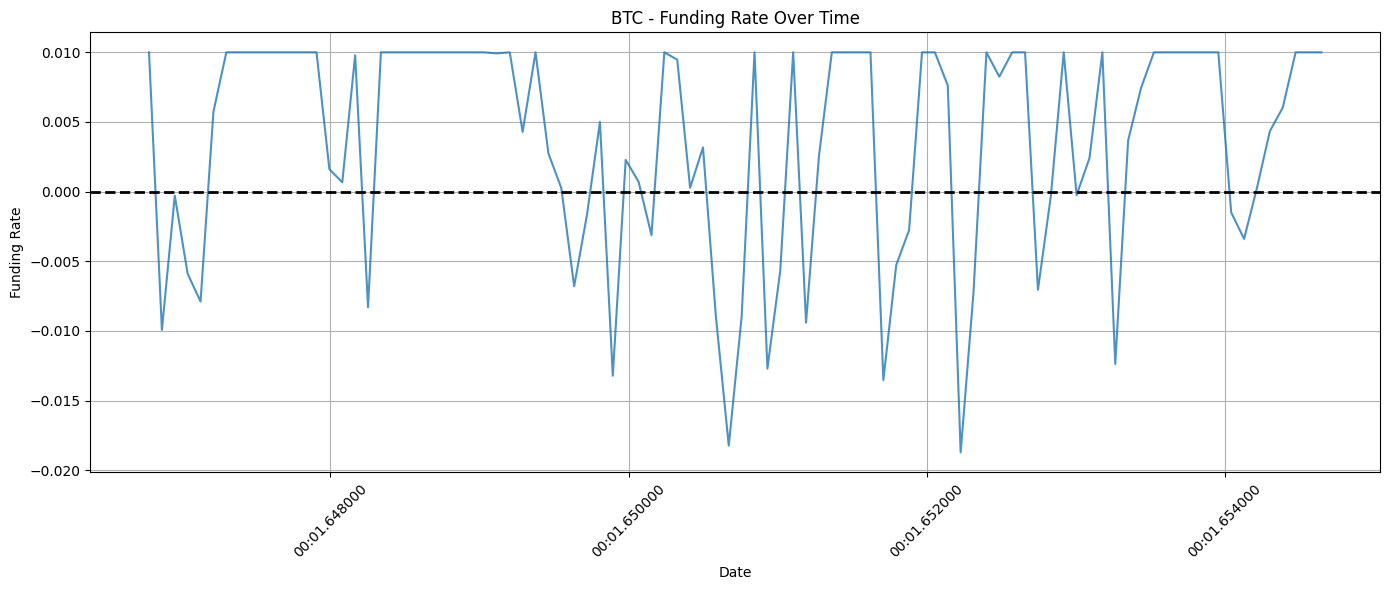

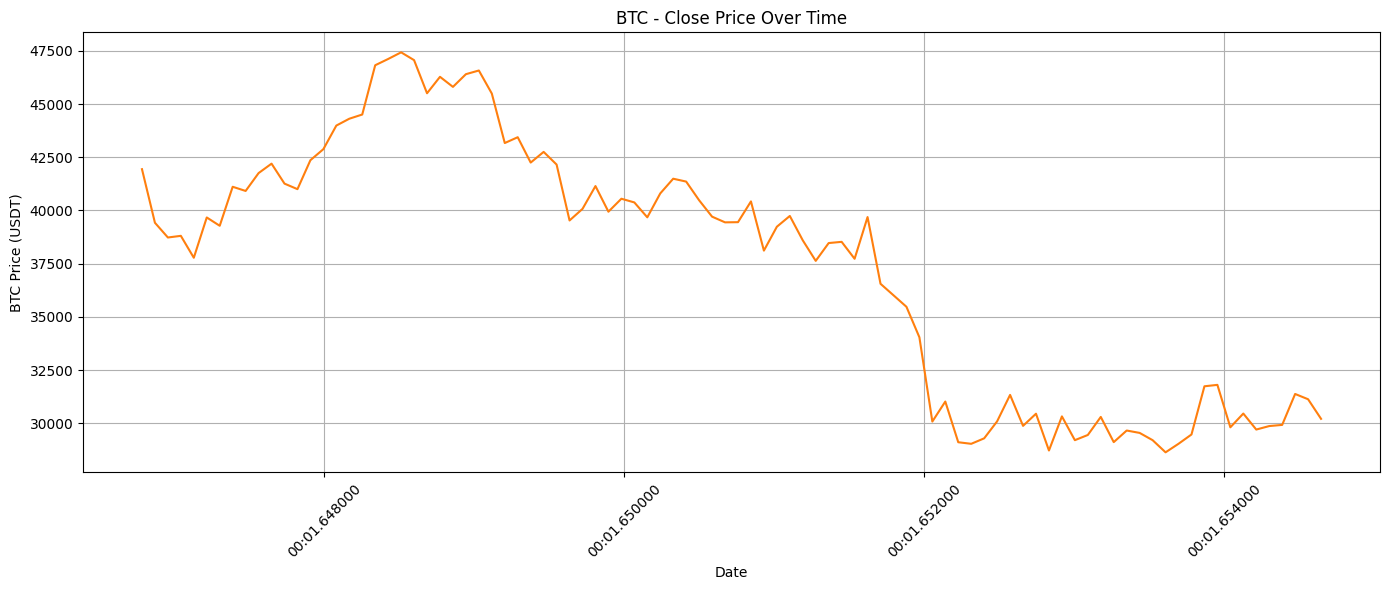

Saved plots to:
 - data\images\BTC_funding_rate.png
 - data\images\BTC_close_price.png


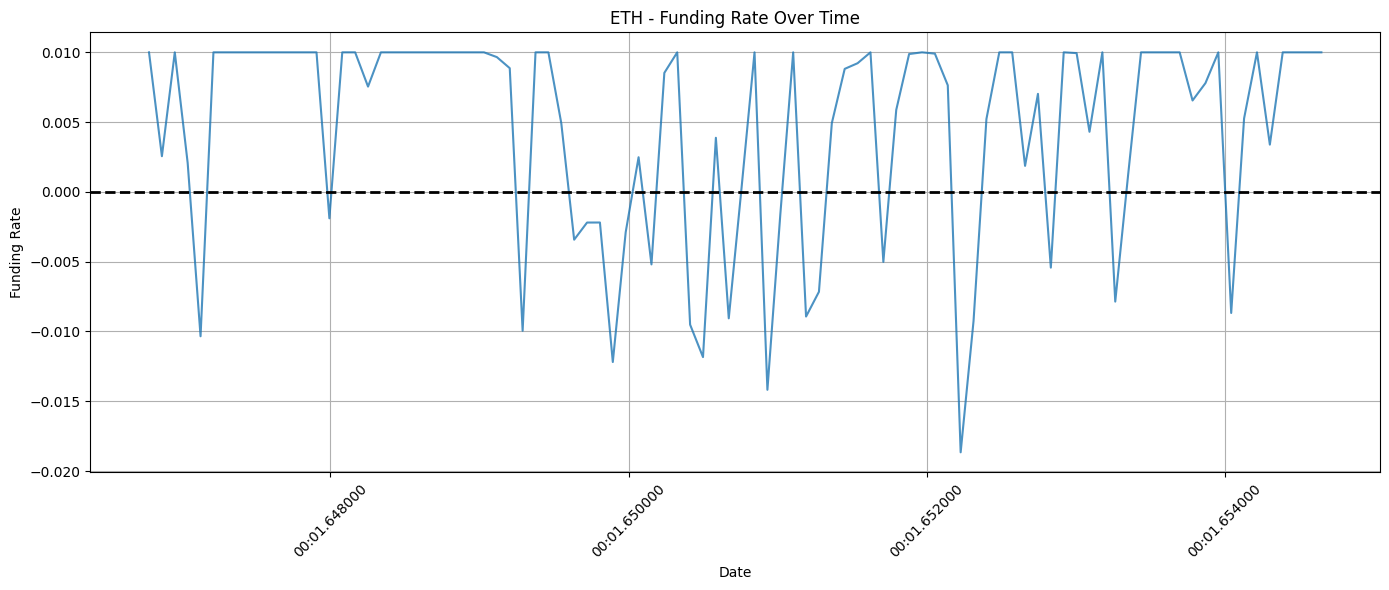

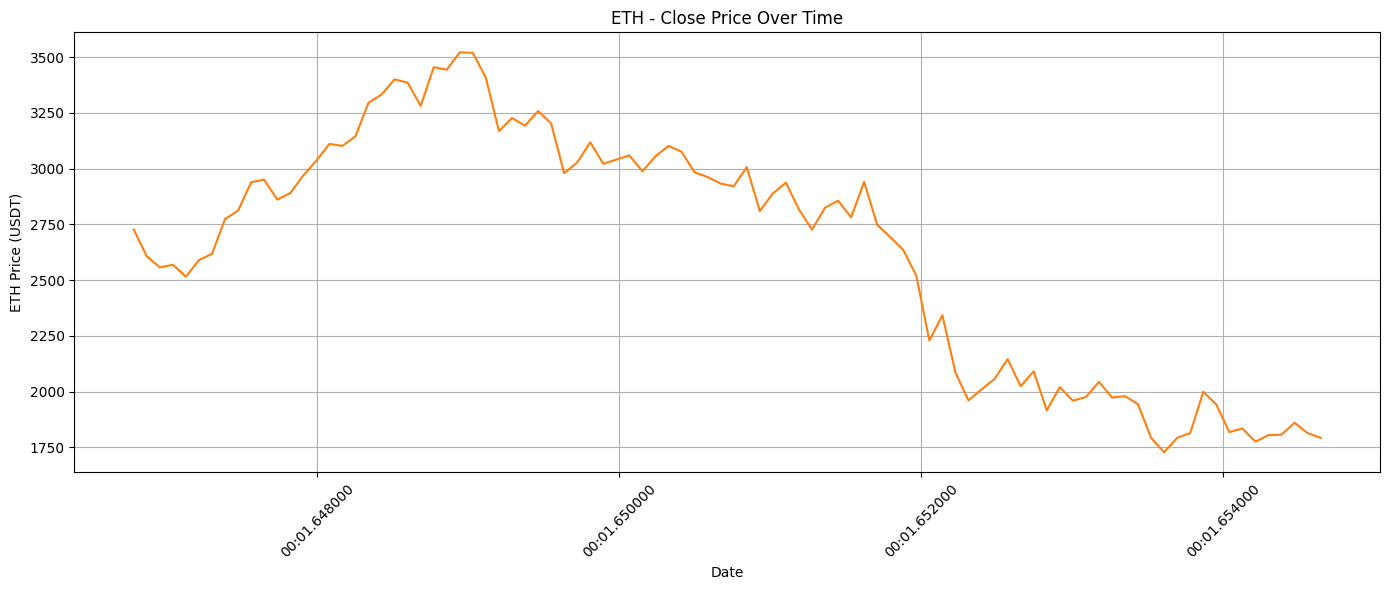

Saved plots to:
 - data\images\ETH_funding_rate.png
 - data\images\ETH_close_price.png


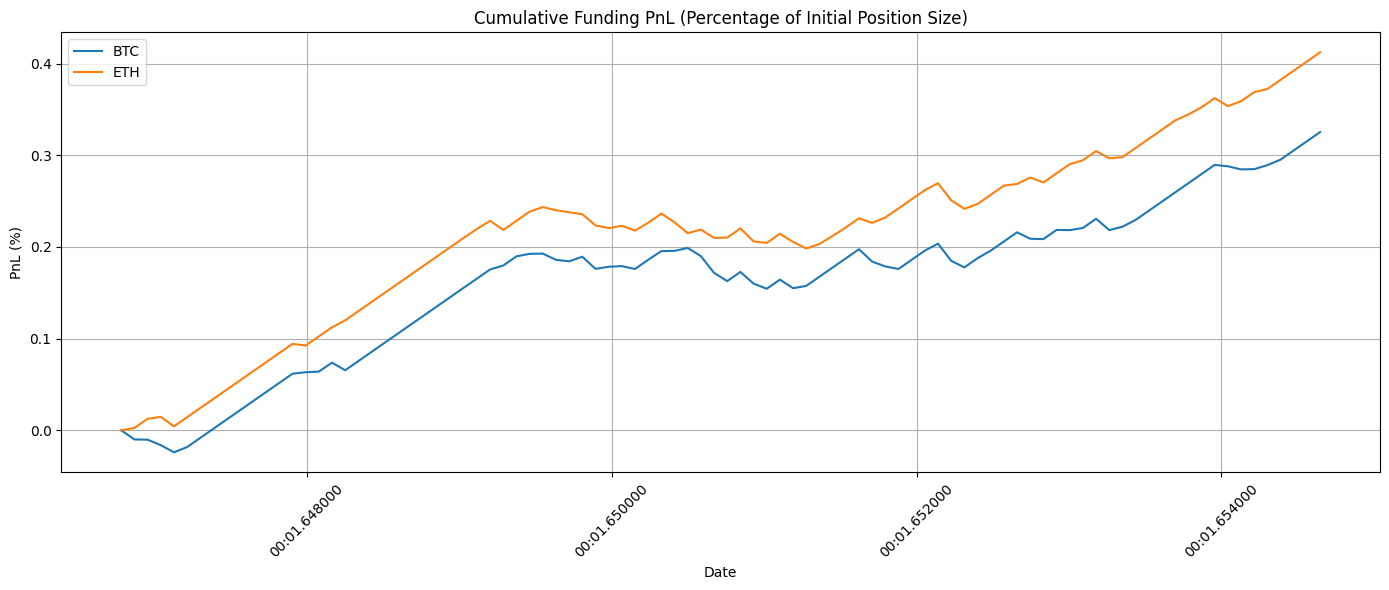

Saved cumulative PnL plot to: data\images\cumulative_funding_pnl.png


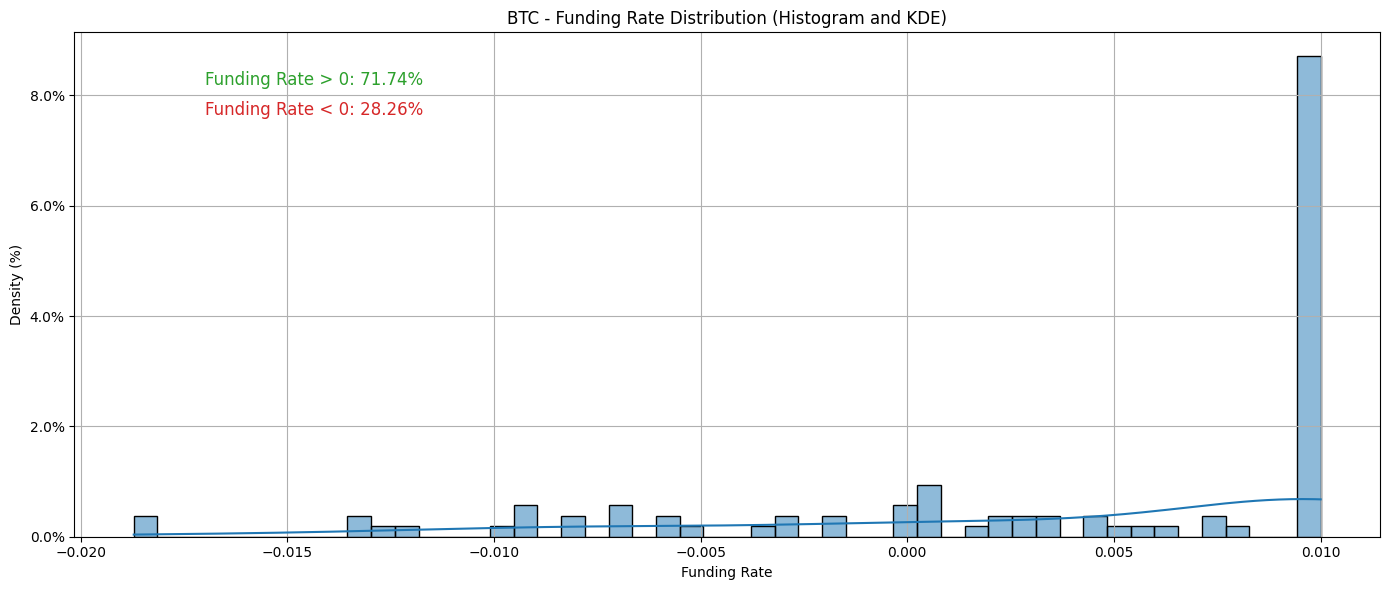

Funding Rate > 0: 71.74%
Funding Rate < 0: 28.26%
Saved plot to: data\images\BTC_funding_rate_distribution.png


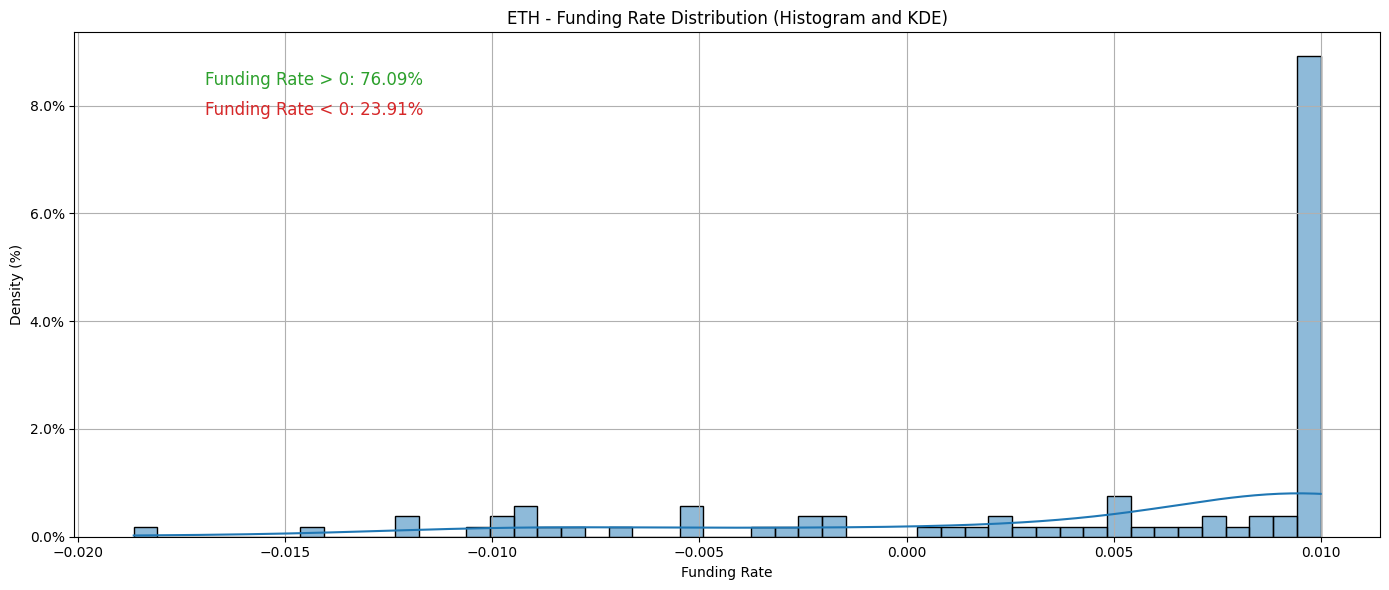

Funding Rate > 0: 76.09%
Funding Rate < 0: 23.91%
Saved plot to: data\images\ETH_funding_rate_distribution.png


In [7]:
file_path = r"data/concat/futures_data_2022-03-09_to_2022-06-09.csv"
df_FR = pd.read_csv(file_path)

file_path = r"data/concat/spots_data_2022-03-09_to_2022-06-09.csv"
df_SP = pd.read_csv(file_path)


btc, eth = prepare_data_for_analyse(df_FR, df_SP)

strat_analyse(btc, eth)

#### FTX collapse, 16 nov 2022

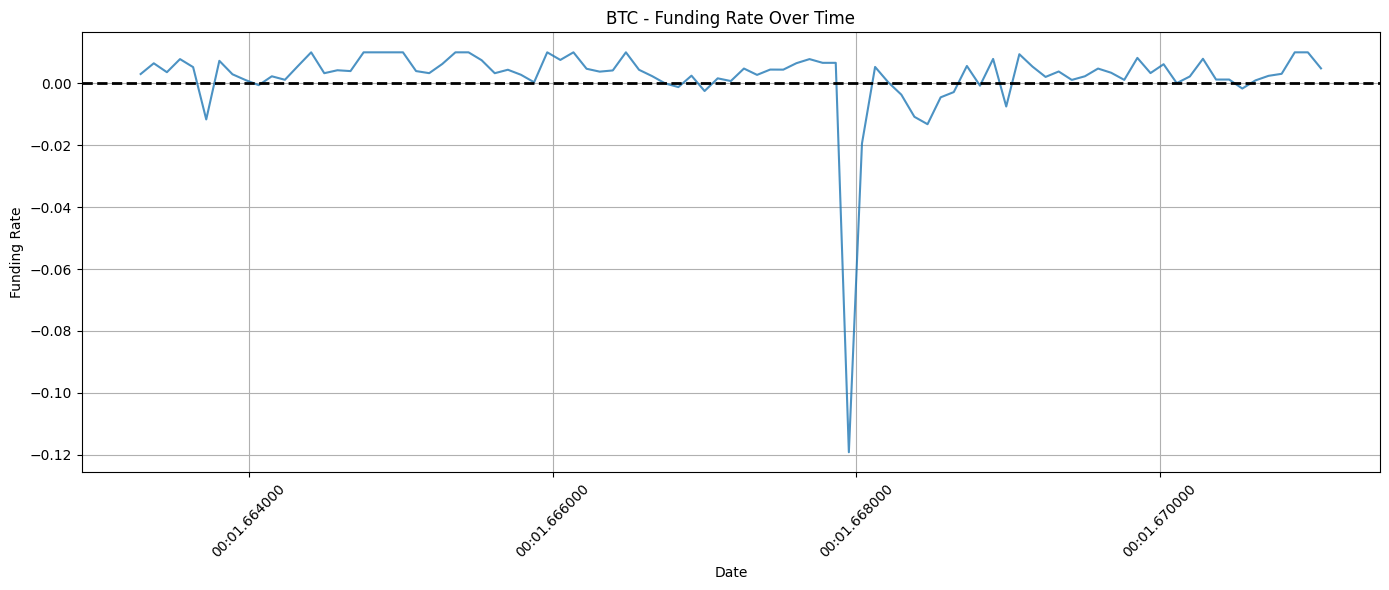

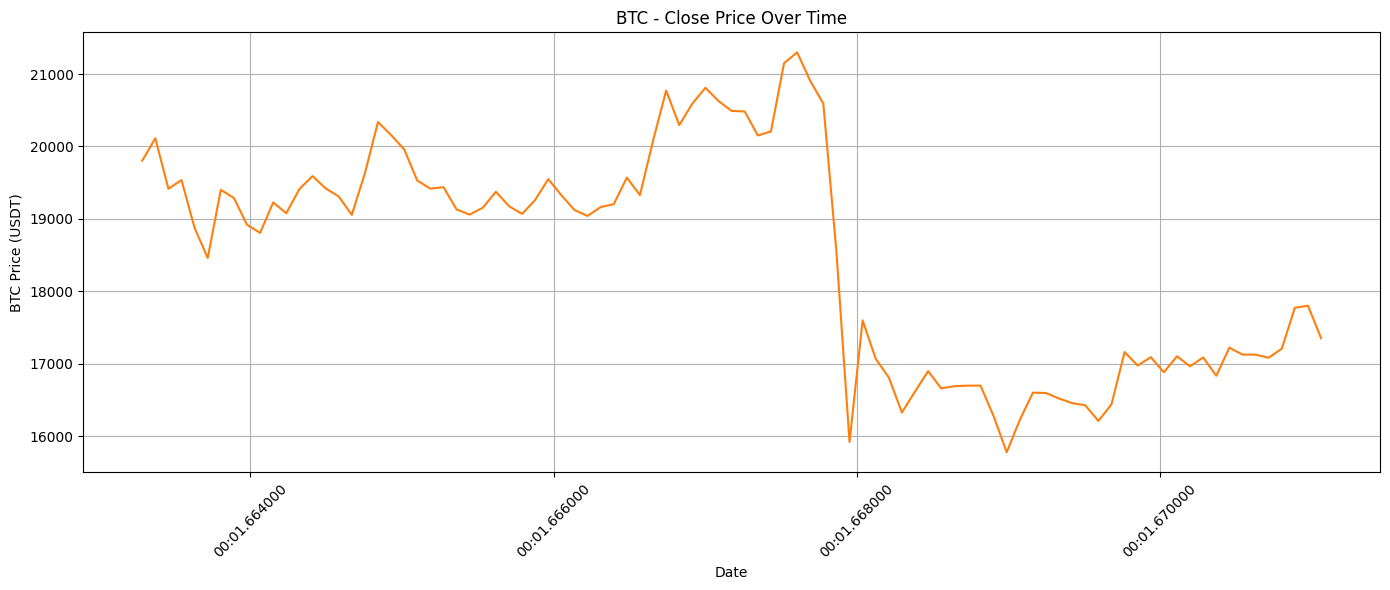

Saved plots to:
 - data\images\BTC_funding_rate.png
 - data\images\BTC_close_price.png


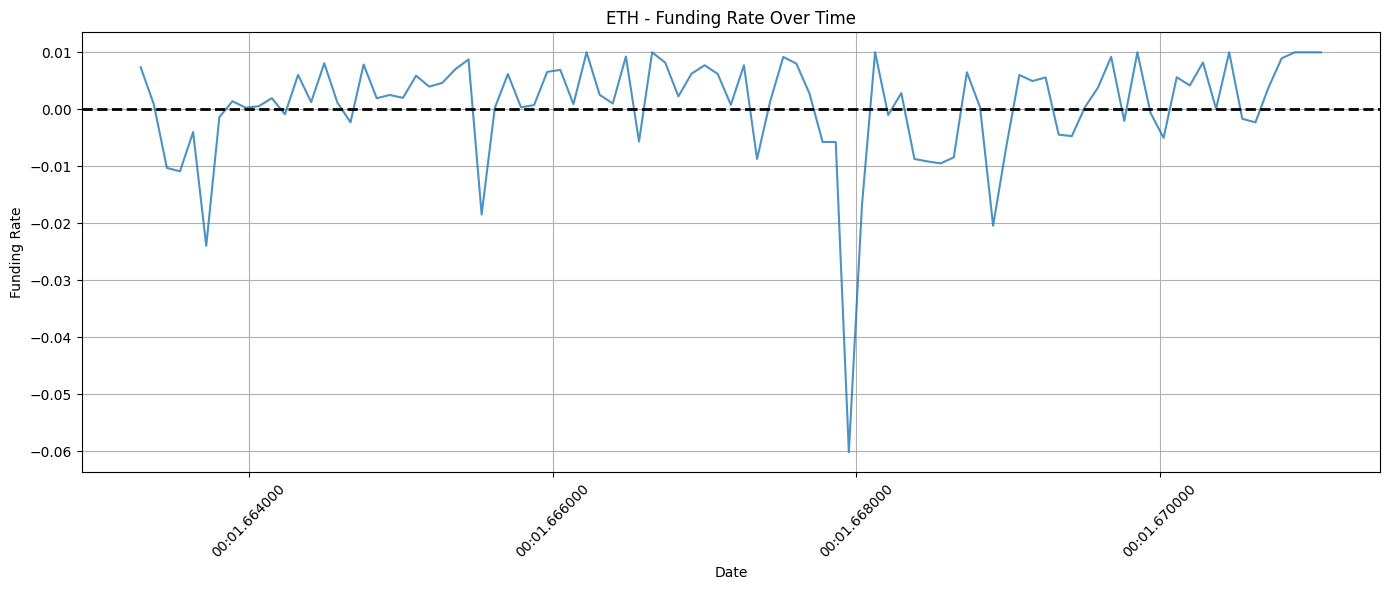

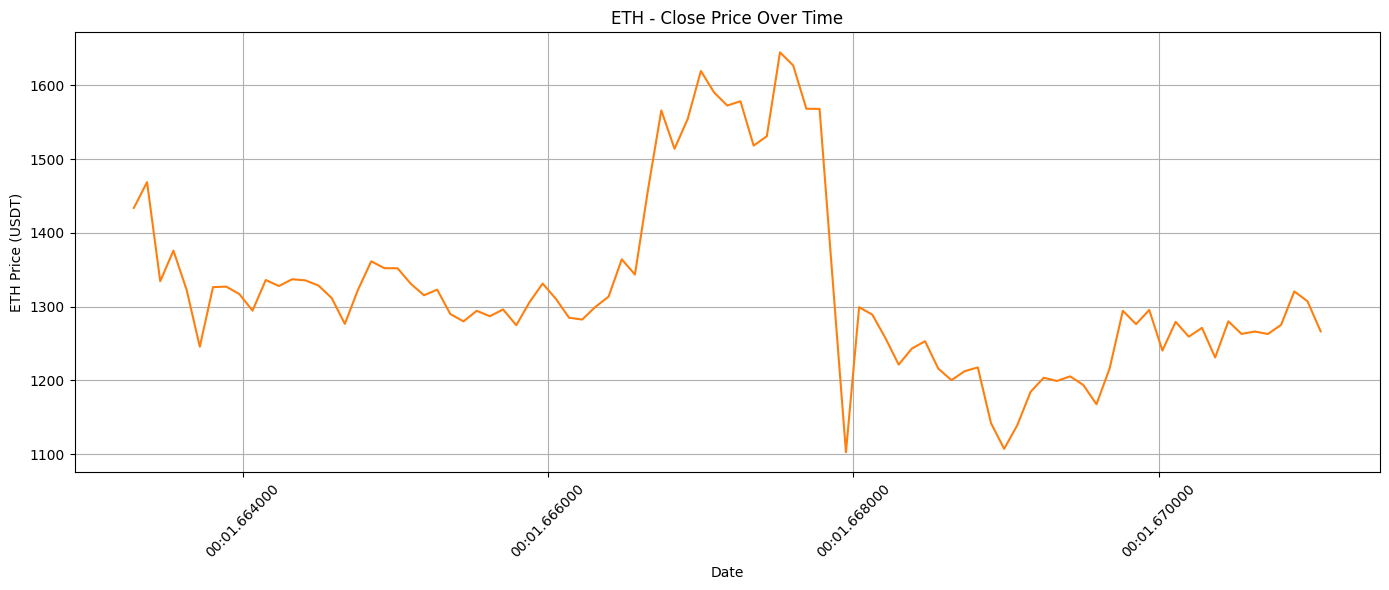

Saved plots to:
 - data\images\ETH_funding_rate.png
 - data\images\ETH_close_price.png


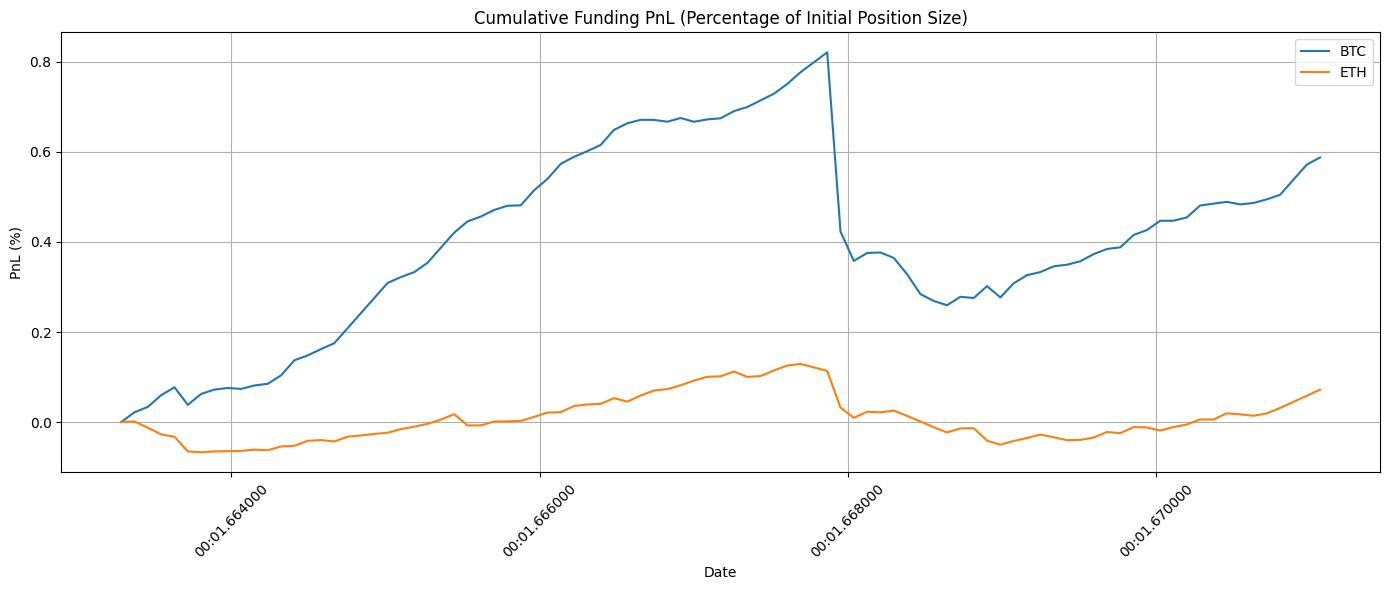

Saved cumulative PnL plot to: data\images\cumulative_funding_pnl.png


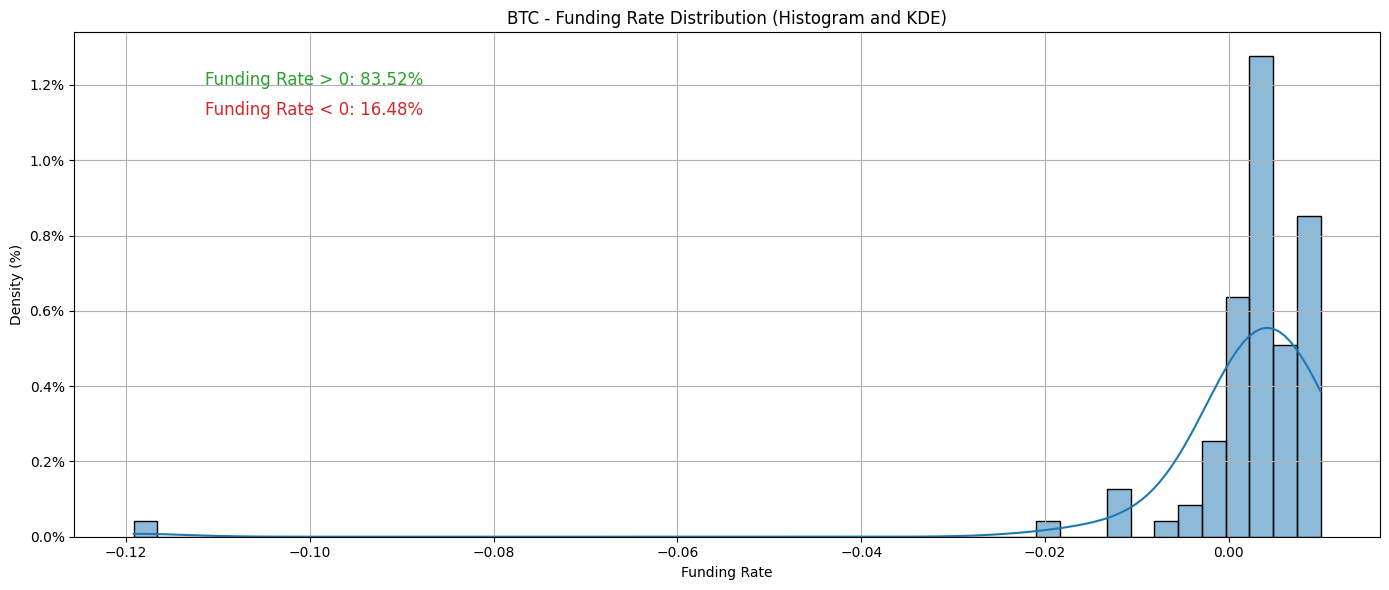

Funding Rate > 0: 83.52%
Funding Rate < 0: 16.48%
Saved plot to: data\images\BTC_funding_rate_distribution.png


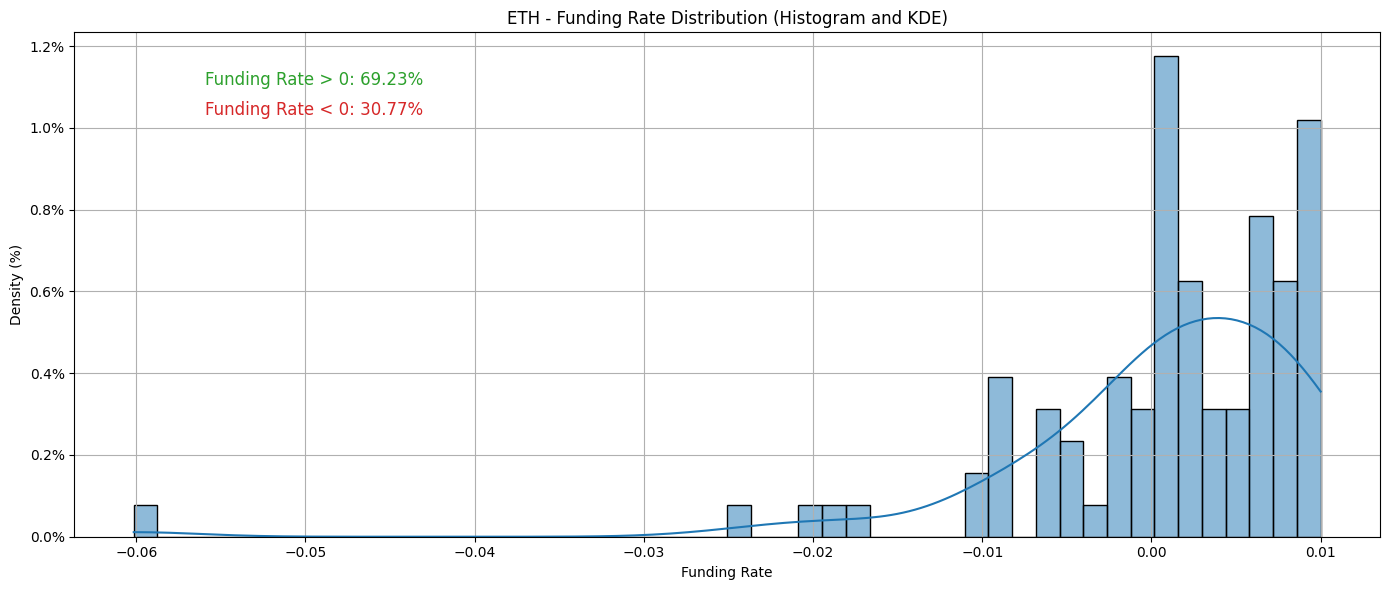

Funding Rate > 0: 69.23%
Funding Rate < 0: 30.77%
Saved plot to: data\images\ETH_funding_rate_distribution.png


In [8]:
file_path = r"data/concat/futures_data_2022-09-16_to_2022-12-16.csv"
df_FR = pd.read_csv(file_path)

file_path = r"data/concat/spots_data_2022-09-16_to_2022-12-16.csv"
df_SP = pd.read_csv(file_path)


btc, eth = prepare_data_for_analyse(df_FR, df_SP)

strat_analyse(btc, eth)

#### 2021 Bull Run, from 29 jul 2020 to 14 nov 2021 

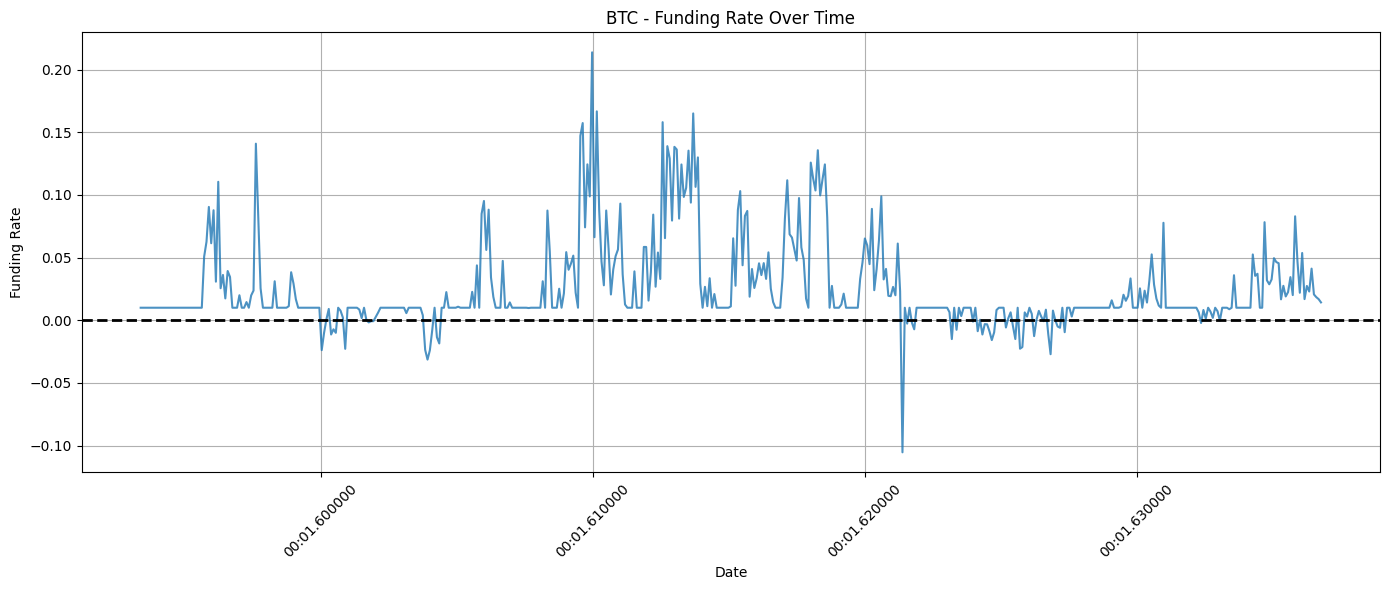

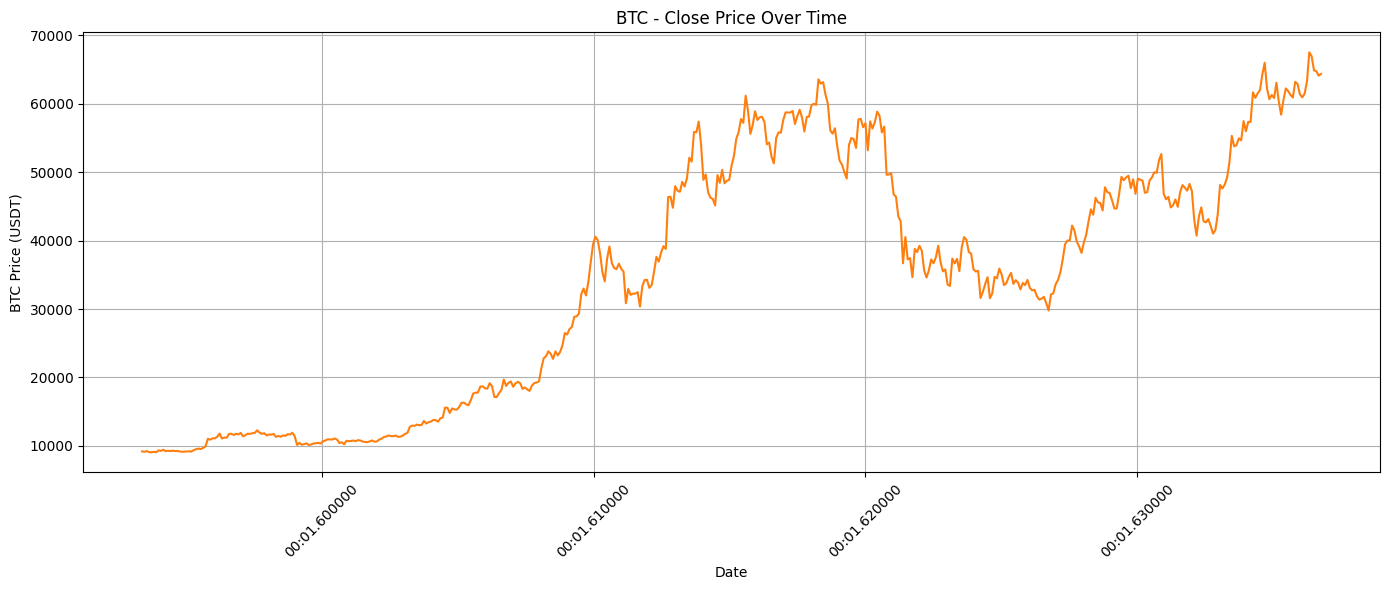

Saved plots to:
 - data\images\BTC_funding_rate.png
 - data\images\BTC_close_price.png


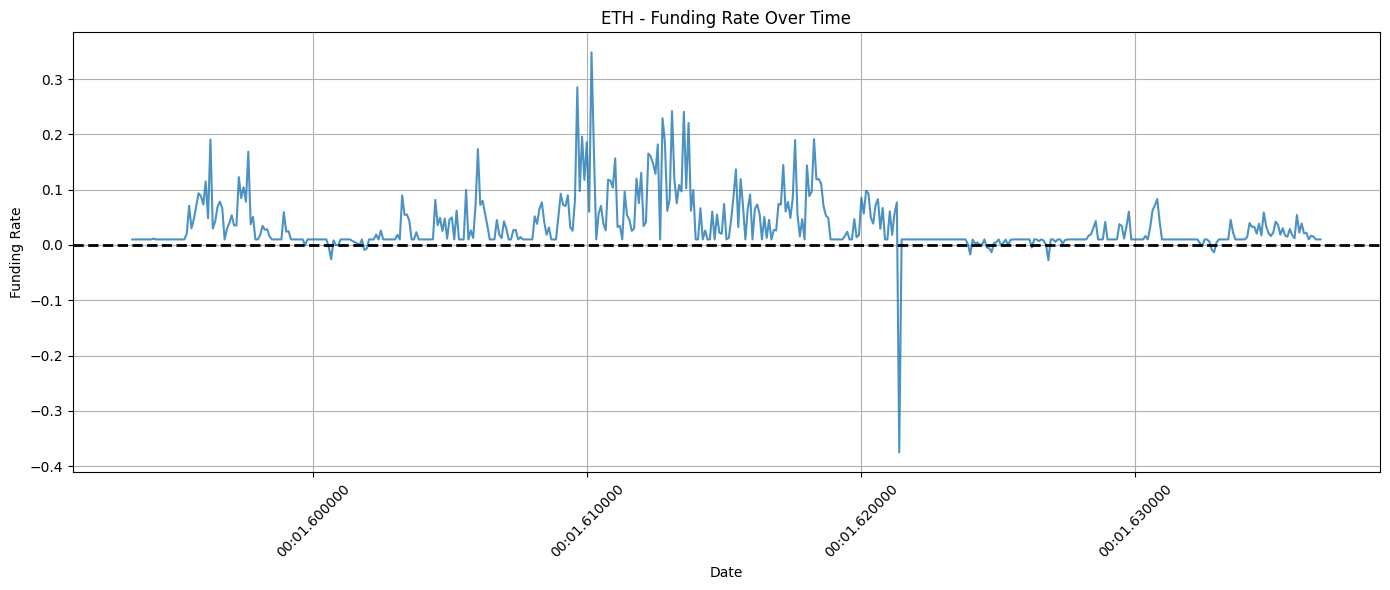

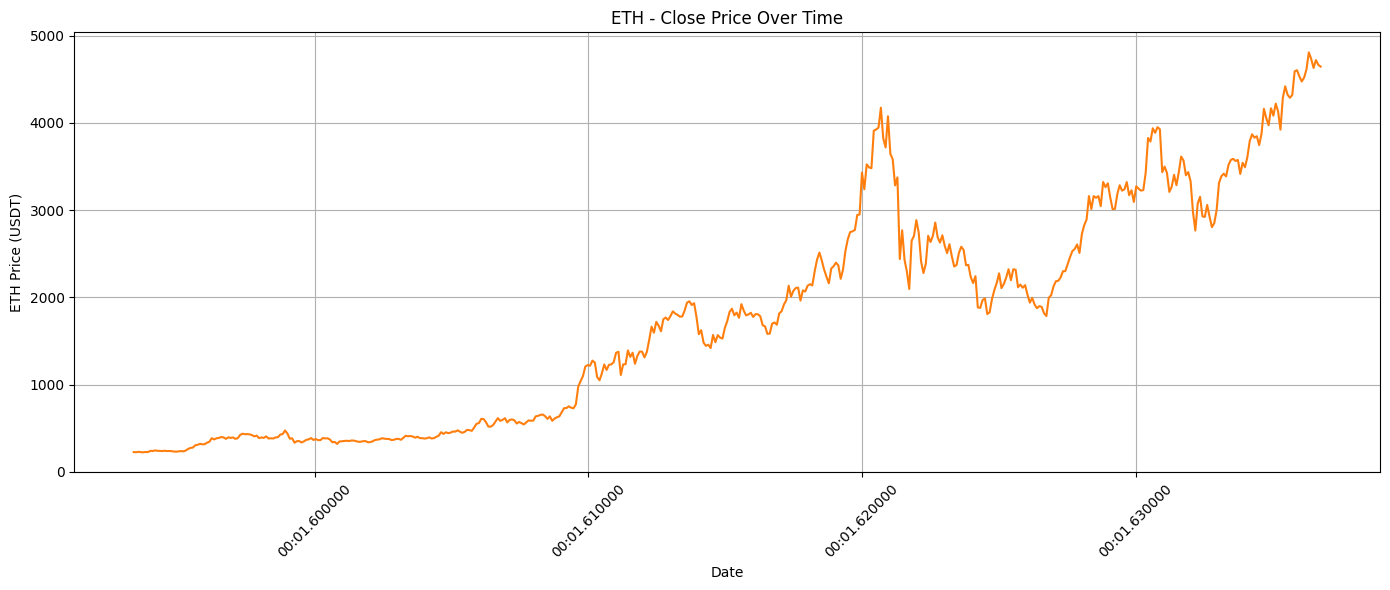

Saved plots to:
 - data\images\ETH_funding_rate.png
 - data\images\ETH_close_price.png


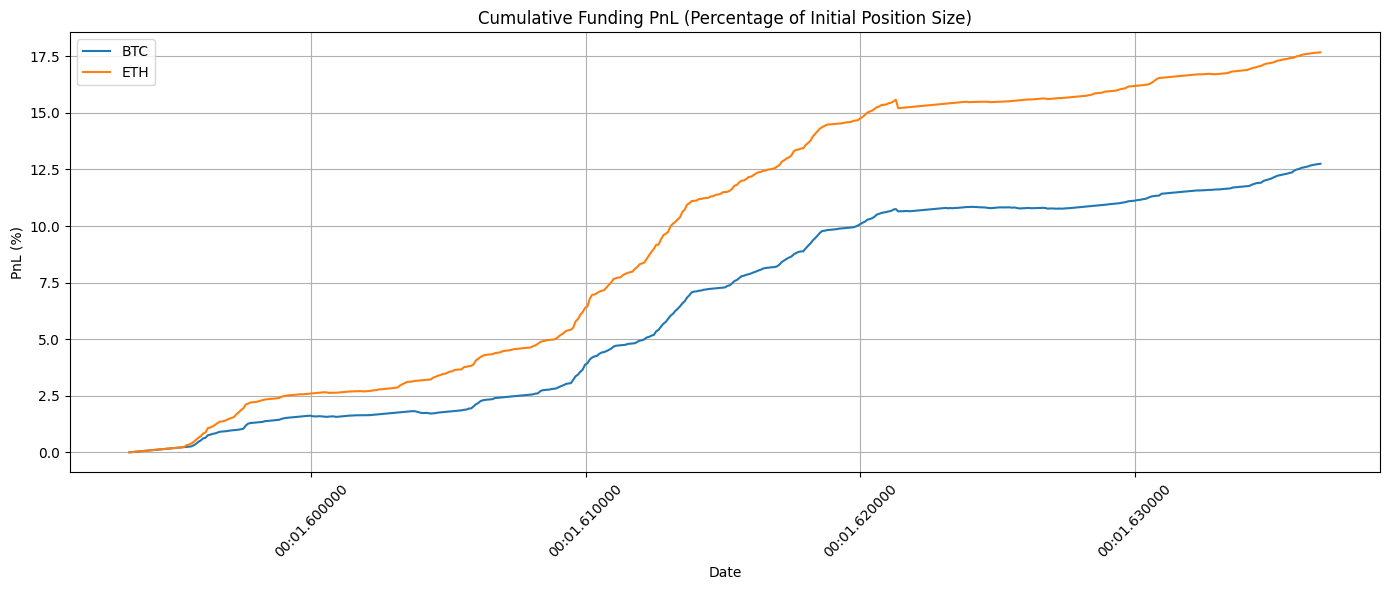

Saved cumulative PnL plot to: data\images\cumulative_funding_pnl.png


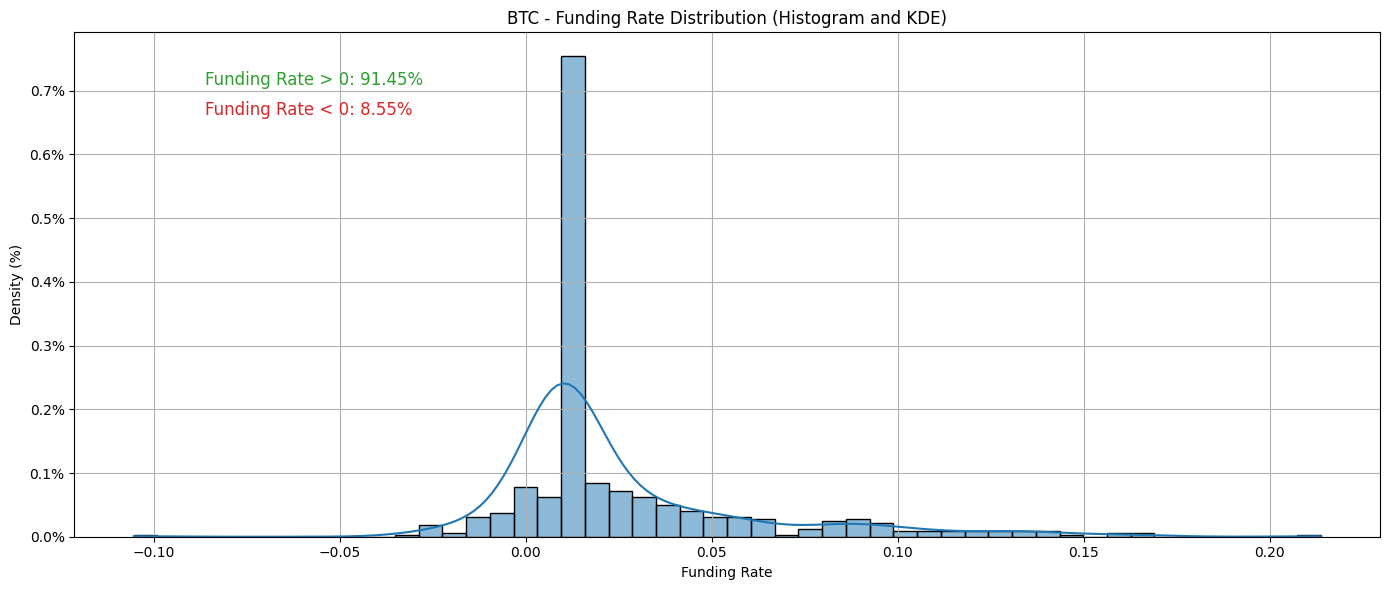

Funding Rate > 0: 91.45%
Funding Rate < 0: 8.55%
Saved plot to: data\images\BTC_funding_rate_distribution.png


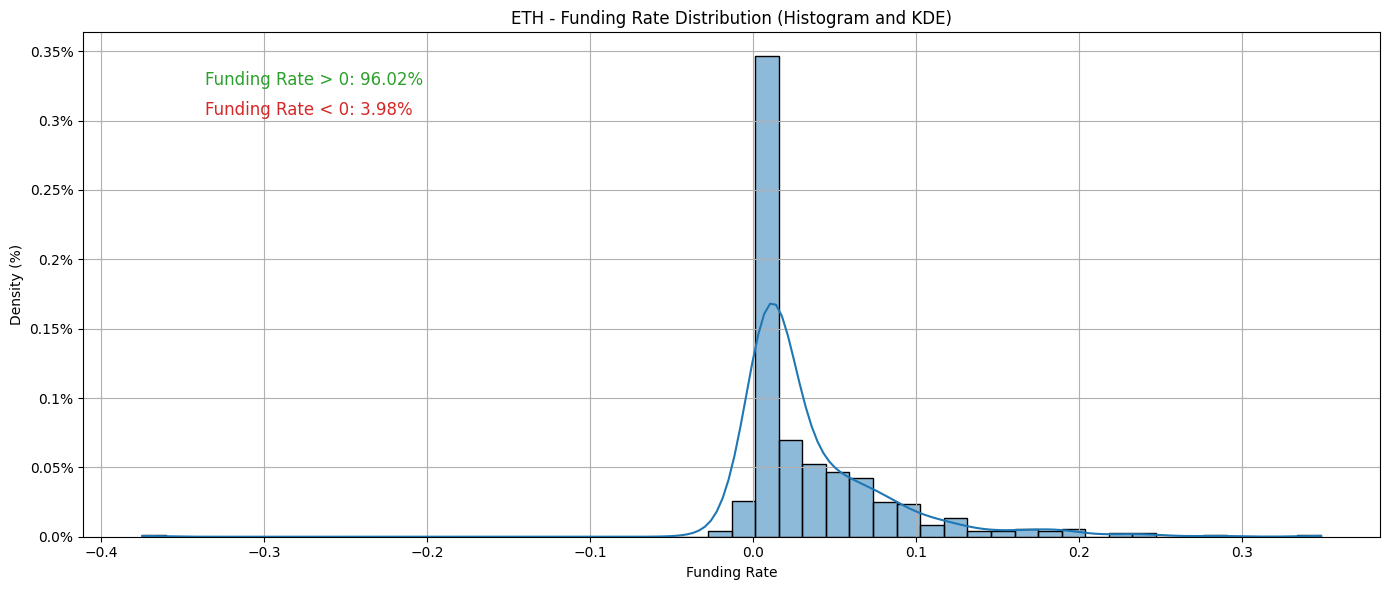

Funding Rate > 0: 96.02%
Funding Rate < 0: 3.98%
Saved plot to: data\images\ETH_funding_rate_distribution.png


In [9]:
file_path = r"data/concat/futures_data_2020-06-29_to_2021-11-14.csv"
df_FR = pd.read_csv(file_path)

file_path = r"data/concat/spots_data_2020-06-29_to_2021-11-14.csv"
df_SP = pd.read_csv(file_path)


btc, eth = prepare_data_for_analyse(df_FR, df_SP)

strat_analyse(btc, eth)

#### BTC ETF approval, 10 jan 2024 

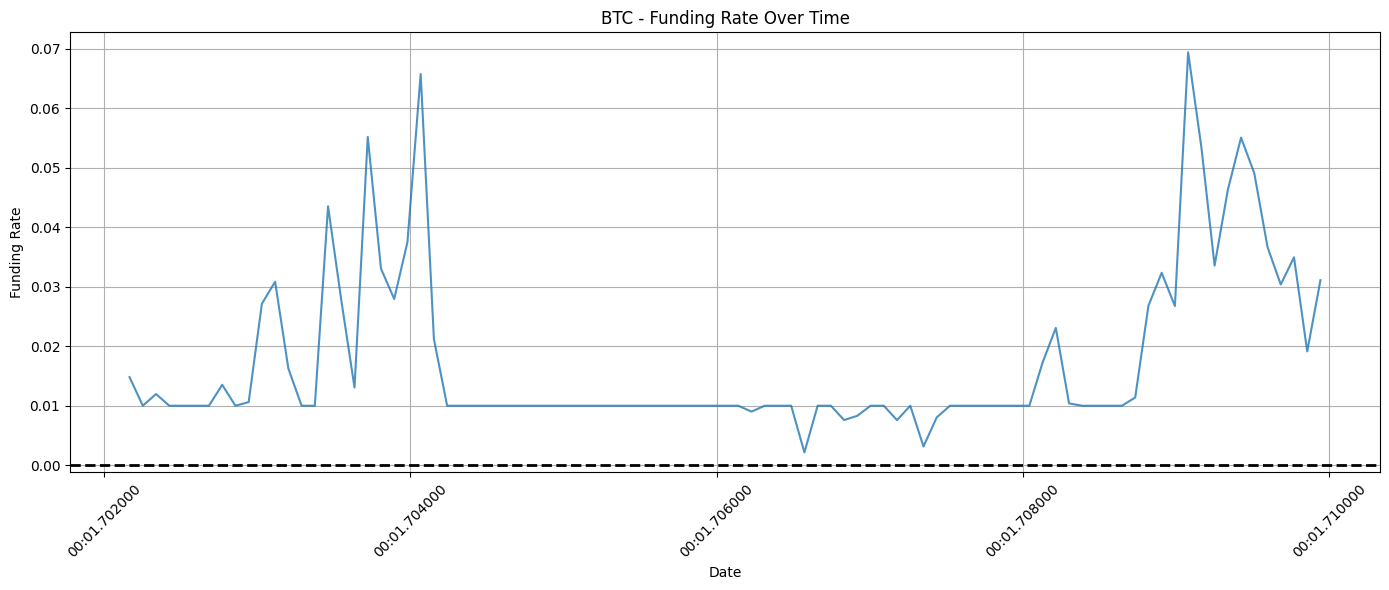

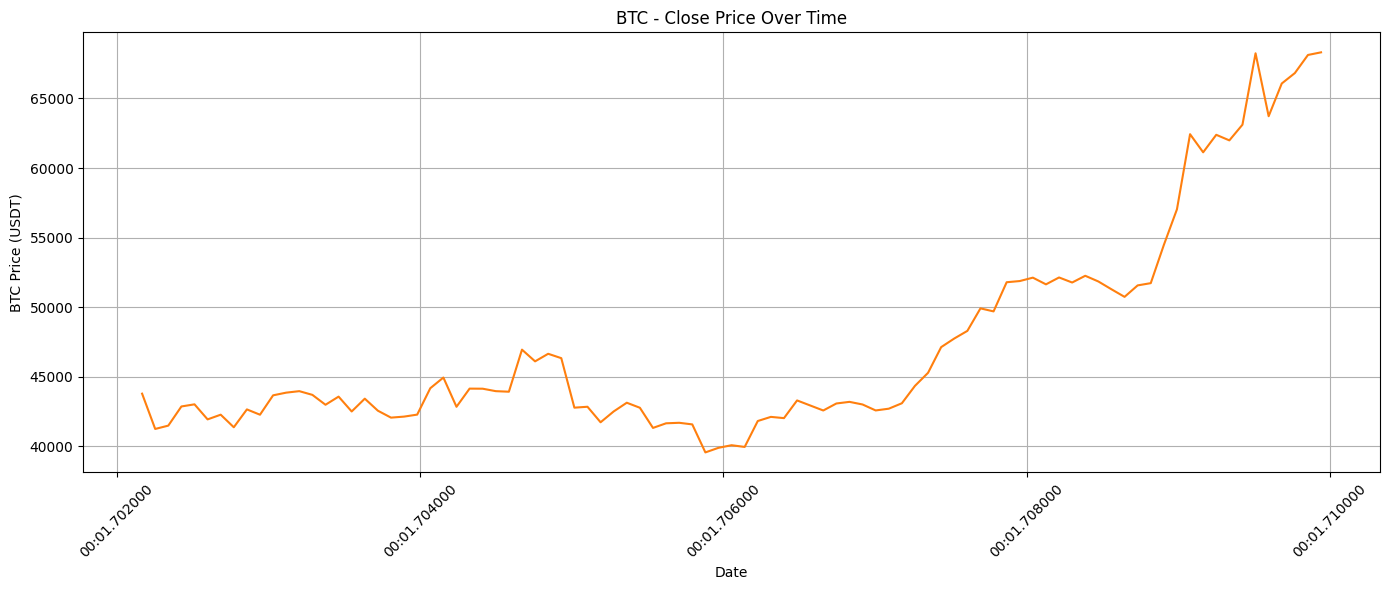

Saved plots to:
 - data\images\BTC_funding_rate.png
 - data\images\BTC_close_price.png


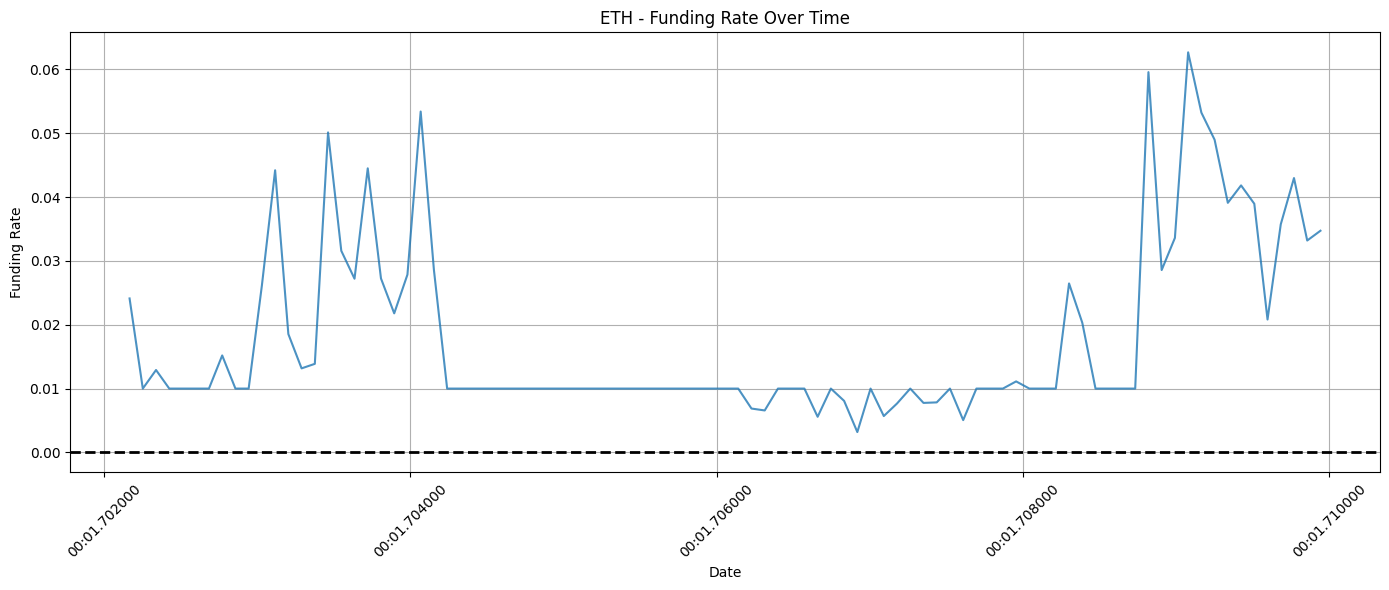

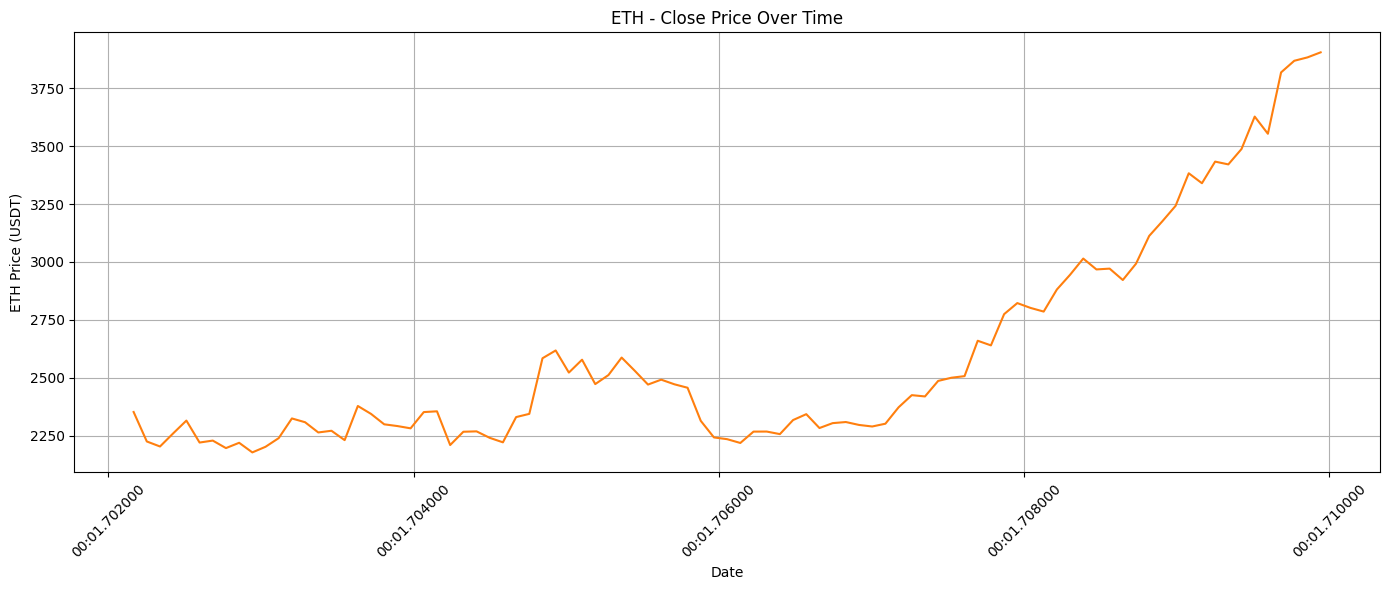

Saved plots to:
 - data\images\ETH_funding_rate.png
 - data\images\ETH_close_price.png


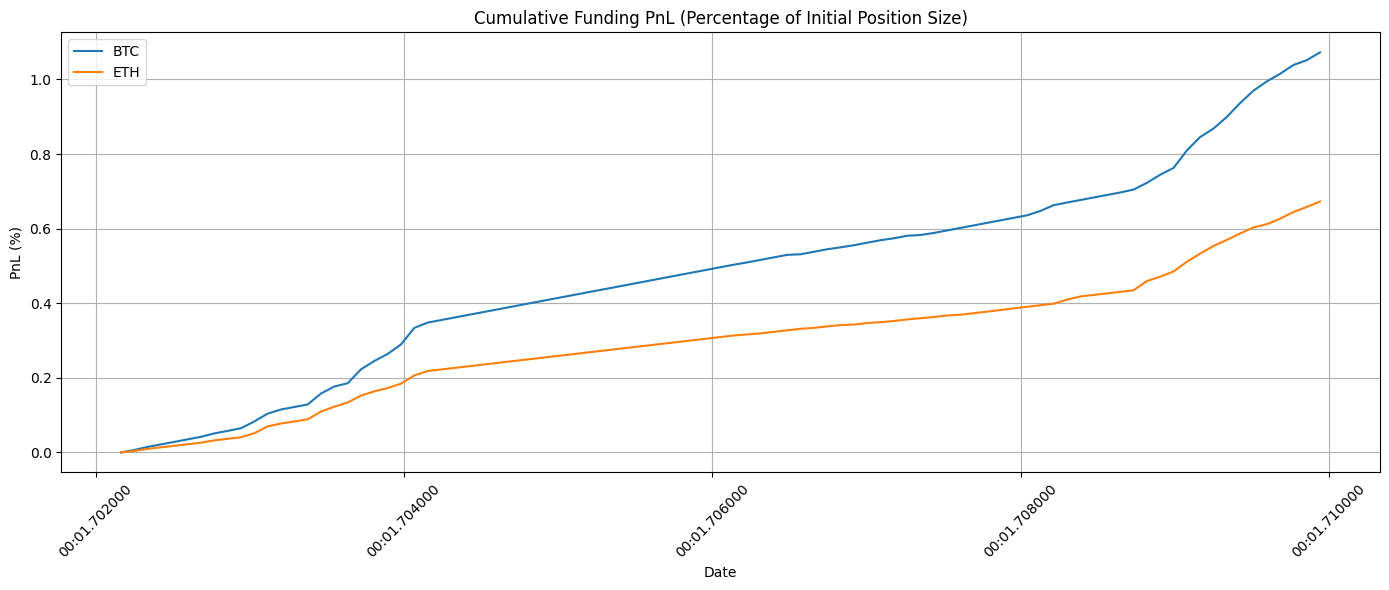

Saved cumulative PnL plot to: data\images\cumulative_funding_pnl.png


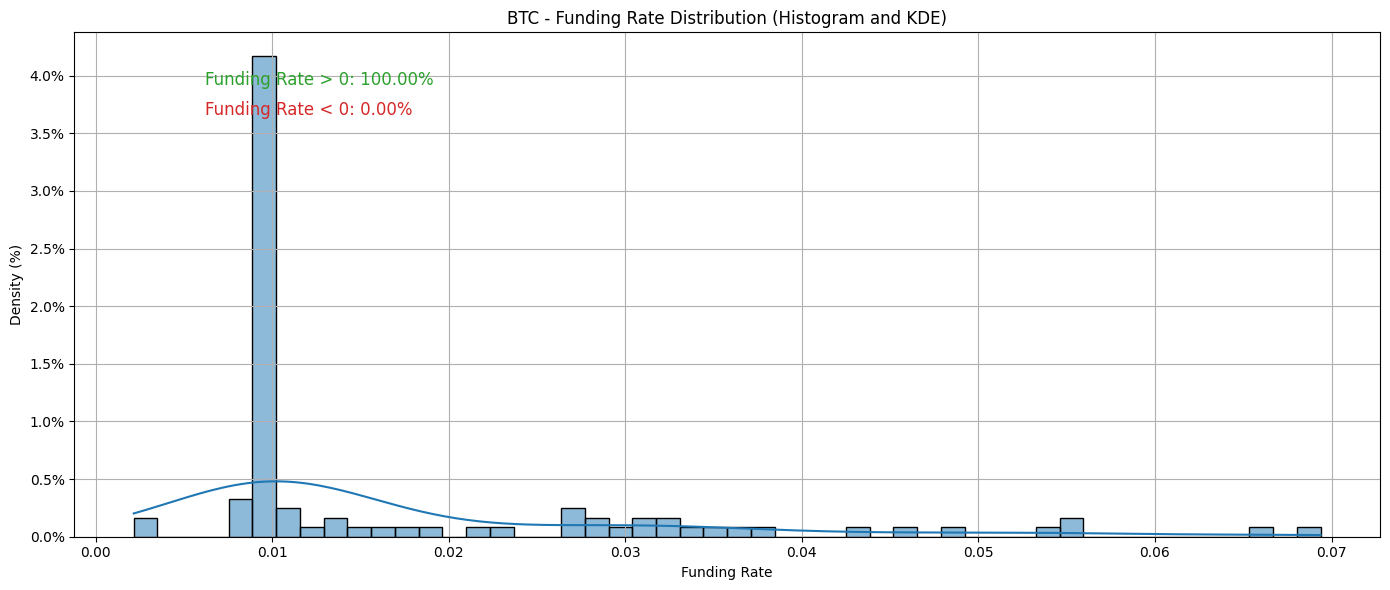

Funding Rate > 0: 100.00%
Funding Rate < 0: 0.00%
Saved plot to: data\images\BTC_funding_rate_distribution.png


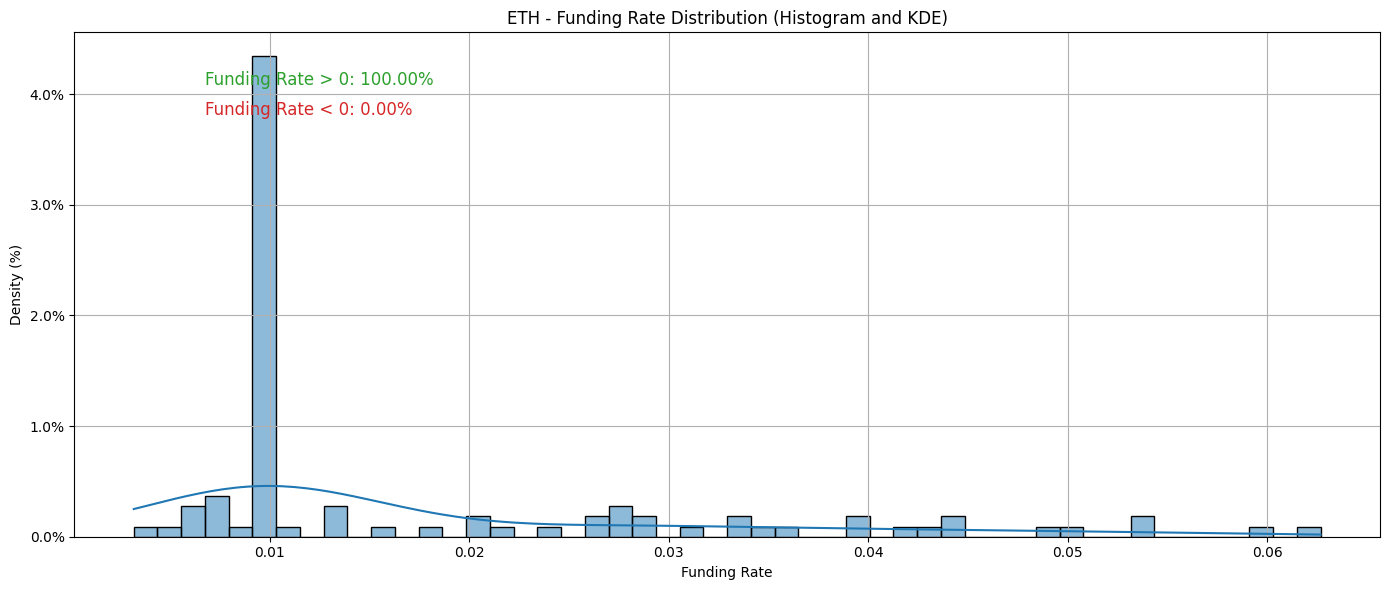

Funding Rate > 0: 100.00%
Funding Rate < 0: 0.00%
Saved plot to: data\images\ETH_funding_rate_distribution.png


In [10]:
file_path = r"data/concat/futures_data_2023-12-10_to_2024-03-10.csv"
df_FR = pd.read_csv(file_path)

file_path = r"data/concat/spots_data_2023-12-10_to_2024-03-10.csv"
df_SP = pd.read_csv(file_path)


btc, eth = prepare_data_for_analyse(df_FR, df_SP)

strat_analyse(btc, eth)